In [10]:
import matplotlib.pyplot as plt
import pandas as pd
import cv2
%matplotlib inline

In [6]:
filein = pd.read_csv('./data/driving_log.csv')
filein

,CENTER,LEFT,RIGHT,STEERING,THROTTLE,BRAKE,SPEED
0,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,0.000000,0.519643,0.0,4.307655
1,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,-0.050000,0.286801,0.0,4.645138
2,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,-0.200000,0.441172,0.0,4.881931
3,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,-0.350000,0.623065,0.0,5.239594
4,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,-0.550000,0.863008,0.0,5.901164
5,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,-0.700000,1.000000,0.0,6.519999
6,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,-0.765380,1.000000,0.0,7.365269
7,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,-0.595367,1.000000,0.0,8.050848
8,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,-0.353489,1.000000,0.0,8.966457
9,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,/home/rohan/Desktop/SDC/CarND-Behavioral-Cloni...,-0.389823,1.000000,0.0,9.640935


In [14]:
vis_path = filein.iloc[0]['CENTER']
vis = cv2.imread(vis_path)
cv2.imwrite('report_imgs/color.png', vis)

True

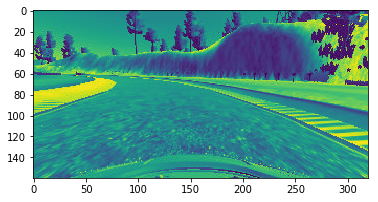

In [15]:
vis_bw = cv2.cvtColor(vis, cv2.COLOR_BGR2GRAY)
plt.imshow(vis_bw)

In [16]:
cv2.imwrite('report_imgs/b&w.png', vis_bw)

True

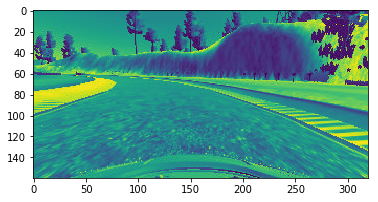

In [17]:
plt.imshow(vis_bw)

In [ ]:
def get_images(path):
    images = []
    cv2.imread

In [18]:
import os


'/home/rohan/Desktop/SDC/CarND-Behavioral-Cloning-P3'